# Text Analysis in Python 2: Counting Words & Terms

<h1 style="text-align:center;font-size:300%;">The United States is / are ____?</h1> 
  <img src="https://miro.medium.com/max/720/1*pp7HX01jBv2wbVRW9Ml_mA.png" style="width:%80;">
  <!--<img src="http://www.languagetrainers.com/blog/wp-content/uploads/2012/10/us-are-vs-us-is1.png" style="width:%140;">-->

From Benjamin Schmidt and Mitch Fraas, ["The Language of the State of the Union](https://www.theatlantic.com/politics/archive/2015/01/the-language-of-the-state-of-the-union/384575/)," *The Atlantic* (Jan. 15, 2015).  **Can we create our own version of this graph?**

## This Lesson

**Exploring the frequency of words and phrases in texts: what can they tell us about a text?**

In this session, participants will:
+ Apply Python (and the NLTK package) to read individual text files and apply essential pre-processing techniques (i.e. divide each text into a list of words or tokens, lower-case all words, remove punctuation, and lemmatize each word).
+ Create frequency lists identifying the most common words or ngrams (multi-word terms) in a text or corpus
+ Create graphs, charts, and word clouds visually representing word and term frequency patterns 
+ Identify some ways the language of State of the Union speeches has changed over time and discuss how this method could be applied to other texts and questions

**In short, one of our goals today is to recreate the graphic above (from *The Atlantic*) showing changes in the frequency of particular words or terms - as used in the State of the Union address - over time.** 


## Structure of Notebooks

These Jupyter Notebooks are designed to integrate instructions and explanations (in the white "markdown" cells below) with hands-on practice with the code (in the gray "code" cells below). To add, modify, or delete cells, please use the Menu above (especially under the Edit, Insert, and Cell tabs) or click ESC + H to see a list of keyboard shortcuts.

<h3 style="color:green">Code Together:</h3><p style="color:green">In these cell blocks, we will code together. You can find the completed version in our shared folder (ending with "_completed.ipynb").</p>

<h3 style="color:blue;">Exercises:</h3><p style="color:blue">are in blue text. These are a chance to practice what you have learned.</p>

<h3 style="color:purple">Python Basics - Additional Practice</h3><p style="color:purple">are in purple text. Work on these after the lesson if you would like more practice.</p>

## Lists of Words, Frequency Lists, N-Grams, and Dispersion Plots

*[intro / explanation / beg instructions / links back to prev notebooks]*

## Part I: Word Counts / Words Count

1. First, we will need to import the necessary Python packages or libraries for today's lesson.

In [1]:
import os, nltk, re, collections, pathlib
import pandas as pd
import matplotlib as plt
import seaborn as sns
from pathlib import Path
from nltk.tokenize import RegexpTokenizer
from nltk import ngrams, pos_tag
from nltk.stem import WordNetLemmatizer

plt.rcParams['figure.figsize'] = [12, 6]  #changes default figure size to make larger plots

%config InteractiveShellApp.matplotlib = 'inline'
%config InlineBackend.figure_formats = ['svg']

2. Navigate to and examine the folder that has your SOTU files.

In [2]:
#os.listdir("sotu2")
p = Path.cwd()
p2 = p.parent
sotudir = Path(p2,"state-of-the-union-dataset","txt")
print(sotudir)
#sotudir=Path("sotu2")
#sotudir=Path("state-of-the-union-dataset").parents[1]
pathlist = sotudir.glob("*.txt")
for path in pathlist:
    print(path)

C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt
C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt\1790_Washington.txt
C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt\1791_Washington.txt
C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt\1792_Washington.txt
C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt\1793_Washington.txt
C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt\1794_Washington.txt
C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt\1795_Washington.txt
C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt\1796_Washington.txt
C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt\1797_Adams.txt
C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt\1798_Adams.txt


3. Open the George Washington's 1795 SOTU address:

In [3]:
# f = open('Bush_2002.txt')

#sotuid="Washington_1794"
#f = open('%s.txt'%sotuid)  #the %s is a placeholder in a string. In this case it is assigned the value of sotuid
#sotu = f.read()
#f.close()

#sotuid="Washington_1794"
sotuid = "1794_Washington"
with open(Path(sotudir,'%s.txt'%sotuid)) as f:
    wash94=f.read()
print(wash94[:400])

Fellow-Citizens of the Senate and House of Representatives:

When we call to mind the gracious indulgence of Heaven by which the
American people became a nation; when we survey the general prosperity of
our country, and look forward to the riches, power, and happiness to which
it seems destined, with the deepest regret do I announce to you that during
your recess some of the citizens of the United


4. Tokenize this address and count the number of tokens.

*Note*: In Python, it is recommended that you always close your files after finishing with them. Since we have already extracted our list of tokens from our text file, we may close it here (see the last line of code below). See [Why Close Python Files](https://realpython.com/why-close-file-python/). 



We can then tokenize this SOTU address and count the number of tokens in it.

In [4]:
tokens = nltk.word_tokenize(wash94)  #this command uses the function word_tokenize() from the package ntlk (which we imported at the beginning of the lesson)
print(sotuid,"is",len(tokens),"tokens long.")
print(tokens[:30],"\n\n")
#we can remove punction tokens using the regTokenizer from ntlk:
#from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokens2=tokenizer.tokenize(wash94)
print("Or is",sotuid,len(tokens2),"tokens long?")
print(tokens2[:30])

1794_Washington is 3197 tokens long.
['Fellow-Citizens', 'of', 'the', 'Senate', 'and', 'House', 'of', 'Representatives', ':', 'When', 'we', 'call', 'to', 'mind', 'the', 'gracious', 'indulgence', 'of', 'Heaven', 'by', 'which', 'the', 'American', 'people', 'became', 'a', 'nation', ';', 'when', 'we'] 


Or is 1794_Washington 2918 tokens long?
['Fellow', 'Citizens', 'of', 'the', 'Senate', 'and', 'House', 'of', 'Representatives', 'When', 'we', 'call', 'to', 'mind', 'the', 'gracious', 'indulgence', 'of', 'Heaven', 'by', 'which', 'the', 'American', 'people', 'became', 'a', 'nation', 'when', 'we', 'survey']


<h3 style = "color:green">Code Together: Words Count</h3>


<p style = "color:green">5. We counted the number of tokens within Washington's 1794 address. Choose another SOTU address and compute and print out the number of words contained within it.</p>

6. Let's convert all tokens into lowercase.

<h3 style = "color:purple">Python Basics: For Loops vs. List Comprehensions</h3>

<p style = "color:purple">7. LIST COMPREHENSIONS: In the previous lesson we converted all tokens to lowercase using a simple **for loop**.</p>

In [5]:
ltokens2 = []
for tok in tokens2:
    ltokens2.append(tok.lower())
print(ltokens2[:40])

['fellow', 'citizens', 'of', 'the', 'senate', 'and', 'house', 'of', 'representatives', 'when', 'we', 'call', 'to', 'mind', 'the', 'gracious', 'indulgence', 'of', 'heaven', 'by', 'which', 'the', 'american', 'people', 'became', 'a', 'nation', 'when', 'we', 'survey', 'the', 'general', 'prosperity', 'of', 'our', 'country', 'and', 'look', 'forward', 'to']


<p style = "color:purple">We can do the same thing using a **list comprehension**. The formula for list comprehensions is:</p>

    newList = [item (or modified item) for item in oldList]

<p style = "color:purple">You can also add a conditional:</p>
    
    newList = [item or (modified item) for item in oldList if item meets condition]
    
 <p style = "color:purple">To create a new list of tokens that have been converted to lower case, we can create the following list comprehension</p>

In [6]:
ltokens2=[tok.lower() for tok in tokens2]
print(ltokens2[:40])
#print("The number of tokens in 'tokens' is",len(tokens))
#print("The number of tokens in 'ltokens2' (with punctuation tokens removed) is",len(ltokens2))

#notice the difference between the 3 token lists below?

['fellow', 'citizens', 'of', 'the', 'senate', 'and', 'house', 'of', 'representatives', 'when', 'we', 'call', 'to', 'mind', 'the', 'gracious', 'indulgence', 'of', 'heaven', 'by', 'which', 'the', 'american', 'people', 'became', 'a', 'nation', 'when', 'we', 'survey', 'the', 'general', 'prosperity', 'of', 'our', 'country', 'and', 'look', 'forward', 'to']


8. Creating frequency lists using the Collections package (take 1)

In [7]:
numsList = [1,2,3,4,3,2,5,4,3,7,6,4,5,8,6,2,4,3,2,4,9,3,2,2,1,1,2,3,5]
numfreqs = collections.Counter(numsList)
print(numfreqs)

Counter({2: 7, 3: 6, 4: 5, 1: 3, 5: 3, 6: 2, 7: 1, 8: 1, 9: 1})


In [8]:
tokfreqs=collections.Counter(ltokens2)
print(tokfreqs.most_common(60))
print("\n")
print(tokfreqs.most_common()[:-60:-1]) #there is no function for returning the least common tokens
     #however, we can essentially do the same thing with the above code 
    # by taking the tokens found at the end of the ordered list of most common tokens (the extra ":" before -60
    # returns the end of this list in reverse)

[('the', 273), ('of', 187), ('to', 138), ('and', 86), ('a', 48), ('that', 39), ('by', 36), ('be', 36), ('in', 36), ('which', 34), ('not', 32), ('have', 30), ('been', 24), ('our', 22), ('it', 22), ('were', 20), ('states', 19), ('as', 19), ('from', 19), ('i', 18), ('an', 18), ('with', 17), ('was', 17), ('their', 17), ('united', 15), ('this', 15), ('government', 14), ('for', 14), ('will', 14), ('them', 13), ('has', 13), ('is', 12), ('they', 12), ('or', 12), ('on', 12), ('laws', 12), ('may', 12), ('who', 11), ('my', 11), ('would', 10), ('too', 10), ('militia', 10), ('all', 10), ('citizens', 9), ('can', 9), ('at', 9), ('but', 9), ('its', 8), ('constitution', 8), ('pennsylvania', 8), ('into', 8), ('against', 8), ('had', 8), ('upon', 8), ('other', 8), ('such', 8), ('are', 8), ('men', 7), ('congress', 7), ('every', 7)]


[('go', 1), ('safeguard', 1), ('anticipations', 1), ('verify', 1), ('conferred', 1), ('goodness', 1), ('perpetuate', 1), ('flight', 1), ('invasion', 1), ('sedition', 1), ('int

9. Remove stop words

The token list above, especially the most common words, does not provide much information about the content of this address. We can learn more by first removing **stop words** from the text. Stop words are common words that reveal little about the meaning of a text (such as articles like "the", conjunctions like "and", prepositions like "on", pronouns like "our", and helper verbs like "can"). Fortunately, NLTK provides a list of stop words in English (and other languages as well) that we can use to eliminate all such words from our texts.

To get an idea of how stop words work, first we will take our list of numbers (numsList) created above and create a copy of this list with all 3s and 7s removed. For texts, we can basically do the same thing: remove all stop words ("a", "this", "that", etc.) from a list of tokens.

In [9]:
print(numsList)
stopNums = [3,7]
newNumsList = [num for num in numsList if num not in stopNums]
print(newNumsList)

[1, 2, 3, 4, 3, 2, 5, 4, 3, 7, 6, 4, 5, 8, 6, 2, 4, 3, 2, 4, 9, 3, 2, 2, 1, 1, 2, 3, 5]
[1, 2, 4, 2, 5, 4, 6, 4, 5, 8, 6, 2, 4, 2, 4, 9, 2, 2, 1, 1, 2, 5]


In [10]:
from nltk.corpus import stopwords
print(stopwords.words('english'))
print("\n***\n")
print(stopwords.words('dutch'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
stop=stopwords.words('english')
print("We had",len(ltokens2),"tokens in our token list.")
print("beginning with:",ltokens2[:30]," \n")

ltokens3=[]
for tok in ltokens2:
    if not tok in stop:
        ltokens3.append(tok)
print("After removing stop words, we now have",len(ltokens3),"tokens in our list.")
print("beginning with:",ltokens3[:30])

#alternate list comprehension method
# ltokens3=[tok for tok in ltokens2 if tok not in stop]

We had 2918 tokens in our token list.
beginning with: ['fellow', 'citizens', 'of', 'the', 'senate', 'and', 'house', 'of', 'representatives', 'when', 'we', 'call', 'to', 'mind', 'the', 'gracious', 'indulgence', 'of', 'heaven', 'by', 'which', 'the', 'american', 'people', 'became', 'a', 'nation', 'when', 'we', 'survey']  

After removing stop words, we now have 1347 tokens in our list.
beginning with: ['fellow', 'citizens', 'senate', 'house', 'representatives', 'call', 'mind', 'gracious', 'indulgence', 'heaven', 'american', 'people', 'became', 'nation', 'survey', 'general', 'prosperity', 'country', 'look', 'forward', 'riches', 'power', 'happiness', 'seems', 'destined', 'deepest', 'regret', 'announce', 'recess', 'citizens']


Thus, our new frequency list of words looks like this:

In [12]:
n=50
print("previously, our most common",n,"tokens were:",tokfreqs.most_common(n))
tokfreqsB=collections.Counter(ltokens3)
print("\nNow our most common",n,"tokens (after removing stop words) are:",tokfreqsB.most_common(n))

previously, our most common 50 tokens were: [('the', 273), ('of', 187), ('to', 138), ('and', 86), ('a', 48), ('that', 39), ('by', 36), ('be', 36), ('in', 36), ('which', 34), ('not', 32), ('have', 30), ('been', 24), ('our', 22), ('it', 22), ('were', 20), ('states', 19), ('as', 19), ('from', 19), ('i', 18), ('an', 18), ('with', 17), ('was', 17), ('their', 17), ('united', 15), ('this', 15), ('government', 14), ('for', 14), ('will', 14), ('them', 13), ('has', 13), ('is', 12), ('they', 12), ('or', 12), ('on', 12), ('laws', 12), ('may', 12), ('who', 11), ('my', 11), ('would', 10), ('too', 10), ('militia', 10), ('all', 10), ('citizens', 9), ('can', 9), ('at', 9), ('but', 9), ('its', 8), ('constitution', 8), ('pennsylvania', 8)]

Now our most common 50 tokens (after removing stop words) are: [('states', 19), ('united', 15), ('government', 14), ('laws', 12), ('may', 12), ('would', 10), ('militia', 10), ('citizens', 9), ('constitution', 8), ('pennsylvania', 8), ('upon', 8), ('men', 7), ('congres

<h3 style='color:blue'>Exercises (Part I)</h3>

<p style='color:blue'>10. Open and read in a different SOTU address of your choice. Tokenize it using the tokenizer we used to remove all punctuation.</p>

<p style='color:blue'>11. Now convert all remaining tokens into lower case and remove all stopwords. How many tokens are now found in your token list?</p>

<p style='color:blue'>13. Create a frequency list of the top 30 words in your new list of tokens (lowercase with all punctuation tokens and stopwords removed). Compare the frequency list to the list we created for Washington's 1794 address. In what ways do they appear most different? Similar?</p>

## III. Create a Dataframe of SOTU texts

In [52]:
tokenizer = RegexpTokenizer(r'\w+')
#n=50

txtList=[]
pathlist = sotudir.glob('*.txt') # .glob only stores the pathlist temporarily (for some reason), so you need to call it again!2
for path in pathlist:
    fn=path.stem   #stem returns the filename minus the ".txt" (file extension). 
    #print(fn)
    fileType=path.suffix
    year,pres=fn.split("_")  #1794_Washington" becomes year = "1794" and pres = "Washington"
    with open(path,'r') as f:  
        sotu = f.read()
    tokens=tokenizer.tokenize(sotu)
    ltokens = [tok.lower() for tok in tokens]
    numtoks = len(ltokens)
    #tokfreqs=collections.Counter(ltokens)
    #wordFreq = tokfreqs[searchTerm]
    
    #print(wordFreq)
    txtList.append([pres,year,numtoks,tokens,sotu])

colnames=['pres','year','numtoks','tokens','fulltext']
sotudf=pd.DataFrame(txtList,columns=colnames)  ##
sotudf.head(10)

,pres,year,numtoks,tokens,fulltext
0,Washington,1790,0,[],
1,Washington,1791,2314,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...
2,Washington,1792,2104,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...
3,Washington,1793,1973,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...
4,Washington,1794,2918,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...
5,Washington,1795,1988,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...
6,Washington,1796,2878,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...
7,Adams,1797,2060,"[Gentlemen, of, the, Senate, and, Gentlemen, o...",Gentlemen of the Senate and Gentlemen of the H...
8,Adams,1798,2218,"[Gentlemen, of, the, Senate, and, Gentlemen, o...",Gentlemen of the Senate and Gentlemen of the H...
9,Adams,1799,1505,"[Gentlemen, of, the, Senate, and, Gentlemen, o...",Gentlemen of the Senate and Gentlemen of the H...


16b. It would be useful to reuse this dataframe in the future. Let's save it to a csv file. 

In [53]:
sotudf.to_csv("sotudf.tsv",encoding = "utf-8",sep="\t")
#we are saving this with a "tsv" extension to indicate we are using tabs ("\t") as our delimiter between columns, not commas
#csv = comma separated values; tsv = tab separated values

WindowsPath('C:/Users/F0040RP/Documents/DartLib_RDS/textAnalysis/word-counts')

## IV. Searching for Specific Words


[dispersion plot]

14. [concordances]

In [13]:
text1 = nltk.Text(tokens) #remember, the tokens variable stores our first set of tokens derived from Washington's 1794 address
    ## for concordances, it makes sense to work with unmodified tokens (in original case with all words and punctuation
    ## still included)
text1.concordance("government")




Displaying 14 of 14 matches:
however , to the character of our Government and to its stability , which can 
 impotency or irresolution in the Government . Legal process was therefore del
heir safety , fled to the seat of Government , it being avowed that the motive
d an alteration in the conduct of Government . Upon testimony of these facts a
 without control ; the friends of Government were insulted , abused , and over
too , was tendered to them by the Government of the United States and that of 
hat the friends to peace and good government were not in need of that aid and 
o resume my duties at the seat of Government , leaving the chief command with 
t , and on future emergencies the Government would be amply repaid by the infl
understand the true principles of government and liberty ; that they feel thei
e highest advantage of republican government to behold the most and the least 
es , and accusations of the whole Government . Having thus fulfilled the engag
 by the imposition of t

In [14]:
#sotuid = "2011_Obama"
#with open(Path(sotudir,'%s.txt'%sotuid)) as f:
#    sotu1=f.read()

#otokens = nltk.word_tokenize(sotu1)
#oltokens = [tok.lower() for tok in otokens]
#otokfreqs=collections.Counter(oltokens)

In [15]:
#tokfreqs[searchTerm]

15. Like a lot of Python functions, NLTK's **concordance**() functions allows us to pass in additional parameters. In this case, we will expand the context of our search terms to 200 characters.

In [16]:
text1.concordance("government",200)

Displaying 14 of 14 matches:
States have been found capable of insurrection . It is due , however , to the character of our Government and to its stability , which can not be shaken by the enemies of order , freely to unfold the 
ling , and that further delay could only create an opinion of impotency or irresolution in the Government . Legal process was therefore delivered to the marshal against the rioters and delinquent dist
 contained . Both of these officers , from a just regard to their safety , fled to the seat of Government , it being avowed that the motives to such outrages were to compel the resignation of the insp
tes , and thereby to extort a repeal of the laws of excise and an alteration in the conduct of Government . Upon testimony of these facts an associate justice of the Supreme Court of the United States
h reached the very existence of social order were perpetrated without control ; the friends of Government were insulted , abused , and overawed into silence or an appa

16. Now, we are going to search across the entire SOTU corpus for a particular search term, count its frequency in each text, and then store that count in a dataframe.

In [54]:
searchTerm = "government"

def getWordFreq (term,toks):
    ltoks = [tok.lower() for tok in toks]
    tokfreqs=collections.Counter(ltoks)
    wordFreq = tokfreqs[term]
    return(wordFreq)


sotudf['wordFreq'] = sotudf['tokens'].apply(lambda x: getWordFreq(searchTerm,x))
sotudf['freq_perMillion'] = sotudf['wordFreq']/sotudf['numtoks']*1000000
sotudf.head()

,pres,year,numtoks,tokens,fulltext,wordFreq,freq_perMillion
0,Washington,1790,0,[],,0,NaN
1,Washington,1791,2314,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,7,3025.064823
2,Washington,1792,2104,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,3,1425.855513
3,Washington,1793,1973,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,3,1520.527116
4,Washington,1794,2918,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,14,4797.806717


In [51]:
#searchTerm = "government"
#tokenizer = RegexpTokenizer(r'\w+')
##n=50

#txtList=[]
#pathlist = sotudir.glob('*.txt') # .glob only stores the pathlist temporarily (for some reason), so you need to call it again!2
#for path in pathlist:
#    fn=path.stem   #stem returns the filename minus the ".txt" (file extension). 
#    #print(fn)
#    fileType=path.suffix
#    year,pres=fn.split("_")  #1794_Washington" becomes year = "1794" and pres = "Washington"
#    with open(path,'r') as f:  
#        sotu = f.read()
#    tokens=tokenizer.tokenize(sotu)
#    ltokens = [tok.lower() for tok in tokens]
#    numtoks = len(ltokens)
#    tokfreqs=collections.Counter(ltokens)
#    wordFreq = tokfreqs[searchTerm]
    
    #print(wordFreq)
#    txtList.append([pres,year,wordFreq,numtoks,tokens,sotu])

#colnames=['pres','year','wordFreq','numtoks','tokens','fulltext']
#sotudf=pd.DataFrame(txtList,columns=colnames)  ##
#sotudf['freq_perMillion'] = sotudf['wordFreq']/sotudf['numtoks']*1000000
#sotudf.head(10)

In [42]:
sotudf.tail(10)

,pres,year,wordFreq,numtoks,tokens,fulltext,freq_perMillion
218,Obama,2009,7,6021,"[Madame, Speaker, Mr, Vice, President, Members...","Madame Speaker, Mr. Vice President, Members of...",1162.597575
219,Obama,2010,13,7252,"[Madame, Speaker, Vice, President, Biden, Memb...","Madame Speaker, Vice President Biden, Members ...",1792.608935
220,Obama,2011,18,7117,"[Mr, Speaker, Mr, Vice, President, members, of...","Mr. Speaker, Mr. Vice President, members of Co...",2529.155543
221,Obama,2012,8,7204,"[Mr, Speaker, Mr, Vice, President, members, of...","Mr. Speaker, Mr. Vice President, members of Co...",1110.494170
222,Obama,2013,10,6607,"[Mr, Speaker, Mr, Vice, President, Members, of...","Mr. Speaker, Mr. Vice President, Members of Co...",1513.546239
223,Obama,2014,4,7017,"[Mr, Speaker, Mr, Vice, President, Members, of...","Mr. Speaker, Mr. Vice President, Members of Co...",570.044178
224,Obama,2015,5,6961,"[Mr, Speaker, Mr, Vice, President, Members, of...","Mr. Speaker, Mr. Vice President, Members of Co...",718.287602
225,Obama,2016,4,5628,"[Mr, Speaker, Mr, Vice, President, Members, of...","Mr. Speaker, Mr. Vice President, Members of Co...",710.732054
226,Trump,2017,9,5095,"[Thank, you, very, much, Mr, Speaker, Mr, Vice...","Thank you very much. Mr. Speaker, Mr. Vice Pre...",1766.437684
227,Trump,2018,5,5204,"[Mr, Speaker, Mr, Vice, President, Members, of...","Mr. Speaker, Mr. Vice President, Members of Co...",960.799385


<AxesSubplot:xlabel='year', ylabel='wordFreq'>

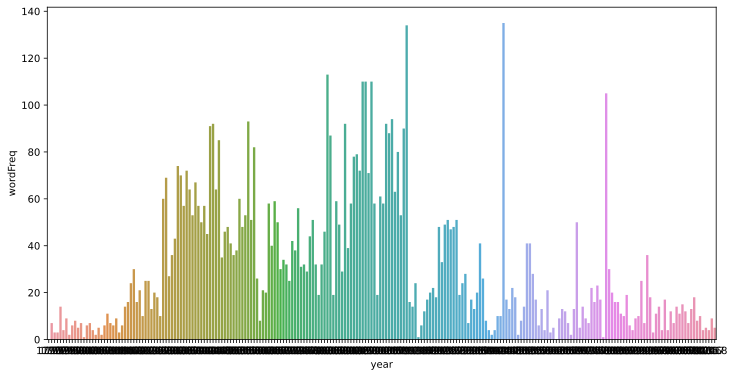

In [55]:
sns.barplot(data=sotudf, x="year", y="wordFreq")

<AxesSubplot:xlabel='year', ylabel='freq_perMillion'>

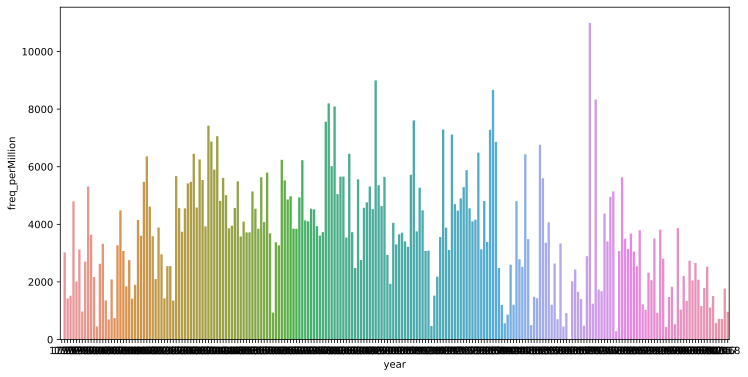

In [20]:
sns.barplot(data=sotudf, x="year", y="freq_perMillion")

17. It would help to simplify this visualization. Following *The Atlantic*'s graphic, we can aggregate these results by President. Normally, we would just apply the **groupby** function to group this data by the president's name.

Unfortunately, when I first tried this, I realized that presidents with the same last name were being grouped together (think of the Adamses, Roosevelts, and Bushes). So, first we need to identify each unique president. To do this, we can use the **shift()** function to identify each time a new president's name appears in our chronologically-ordered dataframe. Thus, George H.W. Bush's administration (1989-1993) can be distinguished from his son's (2001-2009). *This works because, fortunately for our purposes, there has always been a gap between two presidents sharing the same name.*

In [44]:
#print ((sotudf.pres != sotudf.pres.shift()).cumsum())
#sotudf1b = sotudf.groupby([(sotudf.pres != sotudf.pres.shift()).cumsum()])[['wordFreq','numtoks']].sum()
#sotudf1b.head()
sotudf["presnum"] = (sotudf["pres"] != sotudf["pres"].shift()).cumsum()
#sotudf[['pres','year','presnum']]
sotudf.tail(30)

,pres,year,wordFreq,numtoks,tokens,fulltext,freq_perMillion,presnum
198,Bush,1989,6,4917,"[Mr, Speaker, Mr, President, and, distinguishe...","Mr. Speaker, Mr. President, and distinguished ...",1220.256254,39
199,Bush,1990,4,3880,"[Tonight, I, come, not, to, speak, about, the,...","Tonight, I come not to speak about the ""State ...",1030.927835,39
200,Bush,1991,9,3878,"[Mr, President, Mr, Speaker, members, of, the,...","Mr. President, Mr. Speaker, members of the Uni...",2320.783909,39
201,Bush,1992,10,4855,"[Mr, Speaker, Mr, President, distinguished, me...","Mr. Speaker, Mr. President, distinguished memb...",2059.732235,39
202,Clinton,1993,25,7127,"[Mr, President, Mr, Speaker, Members, of, the,...","Mr. President, Mr. Speaker, Members of the Hou...",3507.787288,40
203,Clinton,1994,7,7570,"[Mr, Speaker, Mr, President, members, of, the,...","Mr. Speaker, Mr. President, members of the 103...",924.702774,40
204,Clinton,1995,36,9437,"[Mr, President, Mr, Speaker, members, of, the,...","Mr. President, Mr. Speaker, members of the 104...",3814.771644,40
205,Clinton,1996,18,6412,"[Mr, Speaker, Mr, Vice, President, members, of...","Mr. Speaker, Mr. Vice President, members of th...",2807.236432,40
206,Clinton,1997,3,6876,"[Mr, Speaker, Mr, Vice, President, members, of...","Mr. Speaker, Mr. Vice President, members of th...",436.300175,40
207,Clinton,1998,11,7458,"[Mr, Speaker, Mr, Vice, President, members, of...","Mr. Speaker, Mr. Vice President, members of th...",1474.926254,40


In [45]:
#sotudf2 = sotudf.groupby('pres')["wordFreq", "numtoks"].apply(lambda x : x.astype(int).sum())
#sotudf2 = sotudf.groupby(['pres','presnum'])[['wordFreq','numtoks']].sum()
sotudf2 = sotudf.groupby(['pres','presnum']).agg({'wordFreq':'sum','numtoks':'sum','year':'first'})
sotudf2['freq_perMillion'] = sotudf2['wordFreq'] / sotudf2['numtoks'] * 1000000
sotudf2.head(10)
#sotudf2 = sotudf.groupby('pres')["wordFreq","numtoks"].sum()
#sotudf2.head()



wordFreq  numtoks  year  freq_perMillion
pres      presnum                                          
Adams     2              21     7157  1797      2934.190303
          6              61    31405  1825      1942.365865
Arthur    19            129    20126  1881      6409.619398
Buchanan  14            279    56938  1857      4900.066739
Buren     8             256    45594  1837      5614.773874
Bush      39             29    17530  1989      1654.306902
          41             92    40867  2001      2251.205129
Carter    37            146    45591  1978      3202.386436
Cleveland 20            278    49865  1885      5575.052642
          22            287    59828  1893      4797.084977

In [23]:
#sotudf_1styr = sotudf.groupby(['pres','presnum'])["year"].first()
#sotudf_1styr.head()
#sotudf3 = pd.merge(sotudf2,sotudf_1styr,right_index = True, left_index = True)
#sotudf3.head()

18. Okay, let's see what our graphic looks like:

government


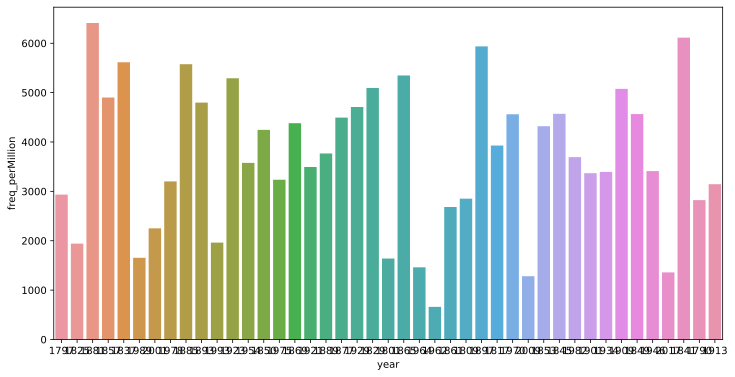

In [46]:
print(searchTerm)
sns.barplot(data=sotudf2, x="year", y="freq_perMillion"); #adding the ";" removes the annoying text that Python sometimes prints out with a graphic

<h3 style = "color:purple">Python Basics: Writing Functions</h3>

19. Now, it would be helpful if we placed the above code into a small program or **function** so that we can easily search for other terms and plot their frequency.

We have already used a variety of core Python functions such as **sum()**, **len()**, and **print()**. We have also called on many functions defined in auxiliary Python libraries or packages: such as the **word_tokenize()** and **concordance** functions from the **nltk** library we imported.

Here, however, we will create our own function. The typical format of a Python function is:

```python
def functionName(argumentsToPassIn):
    function instructions
    return(resultsOfFunction)
```
    
20. So, for example, if we had a list of names and we wanted to create a function to retrieve the initial of each, we could use the following function:

In [25]:
def Initials(fullname):
    caps = re.findall('([A-Z])', fullname) #this use sthe findall function from the re package to find all capitalized letters
    inits = ''.join(caps)  #takes our list of capitalized letters stored in "caps" and concatenates it
    return(inits)
    
fullname = "Jeremy M. Mikecz"
Initials(fullname)

'JMM'

21. We can now apply this function to quickly return the initials from a long list of names.

In [26]:
actorlist = ['Christoph Waltz','Tom Hardy','Doug Walker','Daryl Sabara','J.K. Simmons','Brad Garrett','Chris Hemsworth','Alan Rickman','Henry Cavill','Kevin Spacey','Giancarlo Giannini','Johnny Depp','Johnny Depp','Henry Cavill','Peter Dinklage','Chris Hemsworth','Johnny Depp','Will Smith','Aidan Turner','Emma Stone','Mark Addy','Aidan Turner','Christopher Lee','Naomi Watts','Leonardo DiCaprio','Robert Downey Jr.','Liam Neeson','Bryce Dallas Howard','Albert Finney','J.K. Simmons','Robert Downey Jr.','Johnny Depp','Hugh Jackman','Steve Buscemi','Glenn Morshower','Bingbing Li','Tim Holmes','Emma Stone','Jeff Bridges','Joe Mantegna','Ryan Reynolds','Tom Hanks','Christian Bale','Jason Statham','Peter Capaldi','Jennifer Lawrence','Benedict Cumberbatch','Eddie Marsan','Leonardo DiCaprio','Jake Gyllenhaal','Charlie Hunnam','Glenn Morshower','Harrison Ford','A.J. Buckley','Kelly Macdonald','Sofia Boutella','John Ratzenberger','Tzi Ma','Oliver Platt','Robin Wright','Channing Tatum','Christoph Waltz','Jim Broadbent','Jennifer Lawrence','Christian Bale','John Ratzenberger','Amy Poehler','Robert Downey Jr.','ChloÃ« Grace Moretz','Will Smith','Jet Li','Will Smith','Jimmy Bennett','Tom Cruise','Jeanne Tripplehorn','Joseph Gordon-Levitt','Amy Poehler','Scarlett Johansson','Robert Downey Jr.','Chris Hemsworth','Angelina Jolie Pitt','Gary Oldman','Tamsin Egerton','Keanu Reeves','Scarlett Johansson','Jon Hamm','Judy Greer','Damon Wayans Jr.','Jack McBrayer','Tom Hanks','Vivica A. Fox','Gerard Butler','Nick Stahl','Bradley Cooper','Matthew McConaughey','Leonardo DiCaprio','Mark Chinnery','Aidan Turner','Paul Walker','Brad Pitt','Jennifer Lawrence','Jennifer Lawrence','Nicolas Cage','Jimmy Bennett','Johnny Depp','Justin Timberlake','Dominic Cooper','J.K. Simmons','Bruce Spence','Jennifer Garner','Zack Ward','Anthony Hopkins','Robert Pattinson','Robert Pattinson','Will Smith','Will Smith','Johnny Depp','Janeane Garofalo','Christian Bale','Bernie Mac','Robin Williams','Hugh Jackman','Essie Davis','Josh Gad','Steve Bastoni','Chris Hemsworth','Tom Hardy','Tom Hanks','Chris Hemsworth','ChloÃ« Grace Moretz','Kelli Garner','Liam Neeson','Johnny Depp','Tom Cruise','Anthony Hopkins','Christoph Waltz','Matthew Broderick','Angelina Jolie Pitt','Seychelle Gabriel','Philip Seymour Hoffman','Channing Tatum','Elisabeth Harnois','Hugh Jackman','Hugh Jackman','Ty Burrell','Brad Pitt','Jada Pinkett Smith','Toby Stephens','Ed Begley Jr.','Bruce Willis','Will Smith','Robin Wright','J.K. Simmons','Tom Cruise','Hugh Jackman','John Michael Higgins','Tom Cruise','Christian Bale','Chris Hemsworth','J.K. Simmons','Gerard Butler','Gerard Butler','Sam Shepard','Matt Frewer','Jet Li','Kevin Rankin','Channing Tatum','Matthew McConaughey','Steve Buscemi','Chris Evans','Colin Salmon','James DArcy','Robert Pattinson','Robin Williams','Ty Burrell','Don Johnson','Mark Rylance','Leonardo DiCaprio','Ryan Reynolds','Johnny Depp','Benedict Cumberbatch','Matt Damon','Angelina Jolie Pitt','Judy Greer','Jennifer Lawrence','Robert Pattinson','Jim Parsons','Tom Cruise','Will Smith','Salma Hayek','Angelina Jolie Pitt','Anthony Hopkins','Toby Jones','Daniel Radcliffe','Essie Davis','Will Smith','Alfre Woodard','Rupert Grint','Robin Williams','J.K. Simmons','Daniel Radcliffe','Ryan Reynolds','Mark Chinnery','Johnny Depp','Rupert Grint','Jennifer Lawrence','Tom Hanks','Miguel Ferrer','Hugh Jackman','Paul Walker','Robert Downey Jr.','Liam Neeson','Ronny Cox','Tony Curran','Jeremy Renner','Michael Gough','Clint Howard','Jake Gyllenhaal','Tom Cruise','Karen Allen','Chris Evans','Suraj Sharma','Nicolas Cage','Matt Damon','Demi Moore','Michael Fassbender','Nathan Lane','Matt Damon','Vin Diesel','Gary Oldman','Scott Porter','Shelley Conn','Tom Cruise','Morgan Freeman','Natalie Portman','Natalie Portman','Steve Buscemi','Hugh Jackman','Natalie Portman','Ryan Reynolds','Alain Delon','Nicolas Cage','Chris Hemsworth','Noel Fisher','Phaldut Sharma','Jamie RenÃ©e Smith','Stephen Amell','Tim Blake Nelson','Robin Williams','Dwayne Johnson','Vincent Schiavelli','Heath Ledger','Brad Pitt','Brad Pitt','Kate Winslet','Leonardo DiCaprio','James Corden','Christoph Waltz','George Peppard','Eva Green','Mahadeo Shivraj','Steve Buscemi','Naomi Watts','Hugh Jackman','Jacob Tremblay','Jason Patric','Harrison Ford','Bruce Willis','Christopher Lee','Jim Broadbent','Will Smith','Sean Hayes','Will Smith','Liam Neeson','Chazz Palminteri','Oprah Winfrey','Matt Damon','Mathew Buck','Scarlett Johansson','Del Zamora','Nicolas Cage','Djimon Hounsou','Tom Cruise','Daniel Radcliffe','Eva Green','Cary-Hiroyuki Tagawa','Joe Morton','Johnny Depp','Denzel Washington','Jamie Lee Curtis','Denzel Washington','Robert De Niro','Dwayne Johnson','Vanessa Williams','Leonardo DiCaprio','Demi Moore','Eartha Kitt','Jason Statham','Nicolas Cage','Djimon Hounsou','Catherine OHara','Hugh Jackman','Josh Hutcherson','Johnny Depp','CCH Pounder','Leonardo DiCaprio','Leonardo DiCaprio','Michael Gough','Jake Busey','Tom Hanks','Abbie Cornish','Frances Conroy','Dwayne Johnson','Joseph Gordon-Levitt','Will Ferrell','Jason Statham','Ray Winstone','Jamie Kennedy','Chris Hemsworth','Rosario Dawson','Matt Damon','Francesca Capaldi','Ben Gazzara','Dwayne Johnson','Leonardo DiCaprio','Christian Bale','Jeff Bridges','Jon Lovitz','Ioan Gruffudd','Will Ferrell','Milla Jovovich','Chris Noth','Frank Welker','Peter Dinklage','Hayley Atwell','Michael Imperioli','Alexander Gould','Orlando Bloom','Christopher Lee','Jeff Bridges','Angelina Jolie Pitt','Johnny Depp','Michael Jeter','James Franco','Martin Short','Bruce Willis','Dennis Quaid','Holly Hunter','Christopher Masterson','Logan Lerman','Will Smith','Tom Hanks','Denzel Washington','Mei MelanÃ§on','Harrison Ford','Will Forte','Denis Leary','Adam Scott','Bill Murray','Leonardo DiCaprio','Ming-Na Wen','Robert Downey Jr.','Robin Wright','Bruce Willis','Robert Downey Jr.','Morgan Freeman','Leonard Nimoy','Bella Thorne','Tom Cruise','Adam Sandler','Peter Dinklage','Haley Joel Osment','Marsha Thomason','Matthew McConaughey','Greg Grunberg','Curtiss Cook','Logan Lerman','Gerard Butler','Daniel Radcliffe','Alun Armstrong','Brad Pitt','Don Cheadle','Anne Hathaway','Robin Williams','Don Cheadle','Harrison Ford','Liam Neeson','Tim Blake Nelson','William Smith','Paddy Considine','Shirley Henderson','Jeff Bridges','Philip Seymour Hoffman','Paul Walker','Tom Hanks','Robin Williams','Matt Damon','Harrison Ford','Brad Pitt','Milla Jovovich','Steve Buscemi','Jeff Bennett','Caroline Dhavernas','Denzel Washington','Ioan Gruffudd','Matthew Broderick','Kate Winslet','Will Smith','Meryl Streep','Al Pacino','Jon Favreau','Kate Winslet','Bob Hoskins','Dwayne Johnson','F. Murray Abraham','Li Gong','Amber Stevens West','Jim Broadbent','Anthony Hopkins','Raymond Cruz','Roy Scheider','Julia Roberts','Anna Kendrick','Glenn Morshower','Larry Miller','Sarah Michelle Gellar','Wood Harris','Adam Sandler','Ted Danson','Jack McBrayer','Kristen Stewart','Seth MacFarlane','Robert Downey Jr.','Robert Duvall','Morgan Freeman','Jason Statham','Tom Cruise','Jennifer Lawrence','Bradley Cooper','Michael Gough','Bruce Willis','Tia Carrere','Steve Buscemi','Morgan Freeman','Bruce Willis','Adam Sandler','Amy Poehler','Steve Buscemi','Bill Murray','Keanu Reeves','Leonardo DiCaprio','Jon Favreau','Jim Broadbent','Nicolas Cage','Adam Sandler','Tom Hanks','Adam Sandler','Elden Henson','Steve Buscemi','Rosario Dawson','Philip Seymour Hoffman','Denzel Washington','Robin Williams','Liam Neeson','Bill Murray','Roger Rees','Keanu Reeves','Julia Roberts','Brad Pitt','Harrison Ford','Justin Timberlake','Matt Damon','Rosario Dawson','Gary Oldman','Denzel Washington','Vanessa Redgrave','Steve Buscemi','Elizabeth Montgomery','Quincy Jones','Mark Addy','Charlize Theron','Hugh Jackman','Michael Emerson','Robin Williams','Adam Sandler','Matt Damon','Natalie Portman','Nissim Renard','Anthony Hopkins','Bruce Willis','Bruce Greenwood','Sylvester Stallone','Charlie Rowe','Richard Tyson','Brendan Fraser','Fergie','Paul Walker','Olivia Williams','Adam Goldberg','Vin Diesel','Bob Neill','Mia Farrow','Pedro ArmendÃ¡riz Jr.','David Oyelowo','Sasha Roiz','Sariann Monaco','Adam Goldberg','Matthew Broderick','Josh Hutcherson','Will Forte','Philip Seymour Hoffman','J.K. Simmons','Al Pacino','Paul Walker','Jeff Bridges','Roger Rees','Robert De Niro','Steve Coogan','Jason Flemyng','Steve Carell','Will Smith','Ariana Richards','Jada Pinkett Smith','Charlie Hunnam','Hugh Jackman','Angelina Jolie Pitt','Nicolas Cage','Denis Leary','Adam Sandler','Jerry Stiller','James DArcy','Matthew Broderick','Morgan Freeman','Steve Buscemi','Tom Hanks','Harold Perrineau','Don Cheadle','Nicholas Lea','Philip Seymour Hoffman','Robert De Niro','Loretta Devine','Adam Arkin','Dwayne Johnson','Ayelet Zurer','Bruce Willis','Tom Selleck','Henry Cavill','Adam Sandler','Steve Buscemi','Bruce Willis','Julia Ormond','Bai Ling','Henry Cavill','Jimmy Bennett','Matt Damon','Harrison Ford','Connie Nielsen','Christopher Meloni','Brendan Fraser','Dennis Quaid','Robin Wright','Steve Carell','Jon Hamm','Nicolas Cage','Peter Coyote','Peter Dinklage','Matthew McConaughey','Adam Sandler','Jennifer Garner','Will Ferrell','Raven-SymonÃ©','Mhairi Calvey','Jake Gyllenhaal','Albert Brooks','Martin Landau','Sylvester Stallone','David Gant','Bryce Dallas Howard','Oliver Platt','Rory Culkin','Rupert Everett','John Ratzenberger','Julia Roberts','Vin Diesel','Tim Conway','Lili Taylor','Michael Fassbender','Robin Williams','Dwayne Johnson','Bruce Willis','Jeremy Renner','Nicole Beharie','Tom Cruise','Bryce Dallas Howard','Sanaa Lathan','Amy Poehler','Jon Hamm']

In [27]:
for actor in actorlist:
    print(Initials(actor),"=",actor)

CW = Christoph Waltz
TH = Tom Hardy
DW = Doug Walker
DS = Daryl Sabara
JKS = J.K. Simmons
BG = Brad Garrett
CH = Chris Hemsworth
AR = Alan Rickman
HC = Henry Cavill
KS = Kevin Spacey
GG = Giancarlo Giannini
JD = Johnny Depp
JD = Johnny Depp
HC = Henry Cavill
PD = Peter Dinklage
CH = Chris Hemsworth
JD = Johnny Depp
WS = Will Smith
AT = Aidan Turner
ES = Emma Stone
MA = Mark Addy
AT = Aidan Turner
CL = Christopher Lee
NW = Naomi Watts
LDC = Leonardo DiCaprio
RDJ = Robert Downey Jr.
LN = Liam Neeson
BDH = Bryce Dallas Howard
AF = Albert Finney
JKS = J.K. Simmons
RDJ = Robert Downey Jr.
JD = Johnny Depp
HJ = Hugh Jackman
SB = Steve Buscemi
GM = Glenn Morshower
BL = Bingbing Li
TH = Tim Holmes
ES = Emma Stone
JB = Jeff Bridges
JM = Joe Mantegna
RR = Ryan Reynolds
TH = Tom Hanks
CB = Christian Bale
JS = Jason Statham
PC = Peter Capaldi
JL = Jennifer Lawrence
BC = Benedict Cumberbatch
EM = Eddie Marsan
LDC = Leonardo DiCaprio
JG = Jake Gyllenhaal
CH = Charlie Hunnam
GM = Glenn Morshower
HF =

**Back to our SOTU dataset....**

22. Below, I basically copied the same code we created above, but this time placed into a function. *Note: all code within a function must be indented. Once the indentation ends, so does the function.* 

In [28]:
def sotuWordSearch(searchTerm):
    pathlist = sotudir.glob('*.txt') # .glob only stores the pathlist temporarily (for some reason), so you need to call it again!2
    txtList = []
    for path in pathlist:
        fn=path.stem
        #print(fn)
        fileType=path.suffix
        year,pres=fn.split("_")
        with open(path,'r') as f:  
            sotu = f.read()
        tokens=tokenizer.tokenize(sotu)
        ltokens = [tok.lower() for tok in tokens]
        numtoks = len(ltokens)
        tokfreqs=collections.Counter(ltokens)
        wordFreq = tokfreqs[searchTerm]
        #print(wordFreq)
        txtList.append([pres,year,wordFreq,numtoks,tokens])
    #print(len(txtList))
    colnames=['pres','year','wordFreq','numtoks','tokens']
    sotudf=pd.DataFrame(txtList,columns=colnames)  ##
    sotudf["presnum"] = (sotudf["pres"] != sotudf["pres"].shift()).cumsum()
    #print(sotudf.head())
    #sotudf2 = sotudf.groupby(['pres'])[["wordFreq", "numtoks"]].apply(lambda x : x.astype(int).sum())
    sotudf2 = sotudf.groupby(['pres','presnum']).agg({'wordFreq':'sum','numtoks':'sum','year':'first'})
    #sotudf2 = sotudf.groupby(['pres','presnum'])[['wordFreq','numtoks']].sum()
    #sotudf2 = sotudf.groupby('pres')[['wordFreq','numtoks']].sum()
    sotudf2['freq_perMillion'] = sotudf2['wordFreq'] / sotudf2['numtoks'] * 1000000
    #sotudf_1styr = sotudf.groupby('pres')["year"].first()
    #sotudf_1styr = sotudf.groupby(['pres','presnum'])["year"].first()
    #sotudf3 = pd.merge(sotudf2,sotudf_1styr,right_index = True, left_index = True)
    sotudf2 = sotudf2.sort_values(['year'])
    sotudf2 = sotudf2.reset_index()
    print("searching for... :",searchTerm)
    #print(sotudf3.head())
    return(sotudf2)

23. Now we can choose a new search term and call that function to return a dataframe with the results of this search.

In [29]:
term = "freedom"
df = sotuWordSearch(term)
print(df.tail(10))
#print(df.head())
#df = df.sort_values(['year'])
#print(df.head())
#df = df.reset_index()
#print(df.head())

searching for... : freedom
       pres  presnum  wordFreq  numtoks  year  freq_perMillion
33  Johnson       34        25    29422  1964       849.704303
34    Nixon       35        14    19952  1970       701.684042
35     Ford       36         8    13908  1975       575.208513
36   Carter       37        16    45591  1978       350.946459
37   Reagan       38        93    33031  1982      2815.536920
38     Bush       39        32    17530  1989      1825.442099
39  Clinton       40        30    60117  1993       499.026898
40     Bush       41        83    40867  2001      2030.978540
41    Obama       42        11    53807  2009       204.434367
42    Trump       43         9    10299  2017       873.871250


24. Create a simple graph from this search.

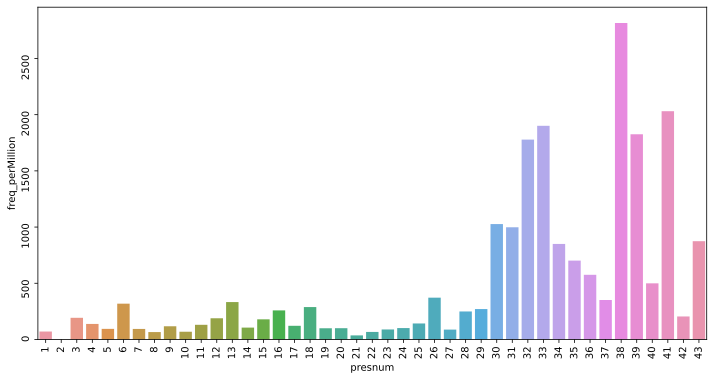

In [30]:
#sns.barplot(data=df, x="year", y="wordFreq")
g=sns.barplot(data=df, x="presnum",y="freq_perMillion")
g.tick_params(labelrotation=90)

25. What additions would make this plot more useful?

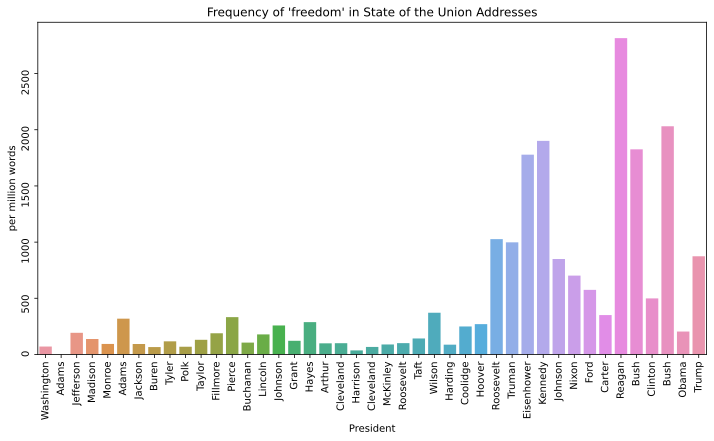

In [31]:
g=sns.barplot(data=df, x="presnum",y="freq_perMillion")
g.tick_params(labelrotation=90)
g.set(title = "Frequency of '%s' in State of the Union Addresses"%term)
g.set(ylabel='per million words', xlabel='President')
g.set(xticklabels = df.pres);


searching for... : war


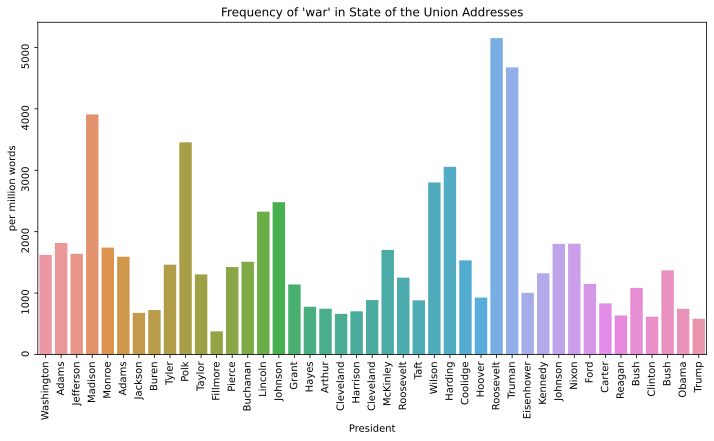

In [32]:
term = "war"
df = sotuWordSearch(term)
g=sns.barplot(data=df, x="presnum",y="freq_perMillion")
g.tick_params(labelrotation=90)
g.set(title = "Frequency of '%s' in State of the Union Addresses"%term)
g.set(ylabel='per million words', xlabel='President')
g.set(xticklabels = df.pres);

In [33]:
# save this image
fig = g.get_figure()
fig.savefig('sotuSearch_%s.png'%term)

## Part IV: Visualizing Word Patterns - Comparing Multiple Words

### Dispersion Plots, Frequency Graphs, etc.

26. [describe]

In [34]:
#on my laptop this took 10 minutes or so
pathlist = sotudir.glob("*.txt")
allSotus = ""
for path in pathlist:
    #fn=path.stem
    #year,pres=fn.split("_")
    with open(path) as f:
        sotu=f.read()
        print("reading:",f)
    sotu+="\n\n***\n\n"
    allSotus+=sotu
print("*** Done reading, now tokenizing ***")
tokens = nltk.word_tokenize(allSotus)
txt = nltk.Text(tokens)



reading: <_io.TextIOWrapper name='C:\\Users\\F0040RP\\Documents\\DartLib_RDS\\textAnalysis\\state-of-the-union-dataset\\txt\\1790_Washington.txt' mode='r' encoding='cp1252'>
reading: <_io.TextIOWrapper name='C:\\Users\\F0040RP\\Documents\\DartLib_RDS\\textAnalysis\\state-of-the-union-dataset\\txt\\1791_Washington.txt' mode='r' encoding='cp1252'>
reading: <_io.TextIOWrapper name='C:\\Users\\F0040RP\\Documents\\DartLib_RDS\\textAnalysis\\state-of-the-union-dataset\\txt\\1792_Washington.txt' mode='r' encoding='cp1252'>
reading: <_io.TextIOWrapper name='C:\\Users\\F0040RP\\Documents\\DartLib_RDS\\textAnalysis\\state-of-the-union-dataset\\txt\\1793_Washington.txt' mode='r' encoding='cp1252'>
reading: <_io.TextIOWrapper name='C:\\Users\\F0040RP\\Documents\\DartLib_RDS\\textAnalysis\\state-of-the-union-dataset\\txt\\1794_Washington.txt' mode='r' encoding='cp1252'>
reading: <_io.TextIOWrapper name='C:\\Users\\F0040RP\\Documents\\DartLib_RDS\\textAnalysis\\state-of-the-union-dataset\\txt\\1795_

reading: <_io.TextIOWrapper name='C:\\Users\\F0040RP\\Documents\\DartLib_RDS\\textAnalysis\\state-of-the-union-dataset\\txt\\1888_Cleveland.txt' mode='r' encoding='cp1252'>
reading: <_io.TextIOWrapper name='C:\\Users\\F0040RP\\Documents\\DartLib_RDS\\textAnalysis\\state-of-the-union-dataset\\txt\\1889_Harrison.txt' mode='r' encoding='cp1252'>
reading: <_io.TextIOWrapper name='C:\\Users\\F0040RP\\Documents\\DartLib_RDS\\textAnalysis\\state-of-the-union-dataset\\txt\\1890_Harrison.txt' mode='r' encoding='cp1252'>
reading: <_io.TextIOWrapper name='C:\\Users\\F0040RP\\Documents\\DartLib_RDS\\textAnalysis\\state-of-the-union-dataset\\txt\\1891_Harrison.txt' mode='r' encoding='cp1252'>
reading: <_io.TextIOWrapper name='C:\\Users\\F0040RP\\Documents\\DartLib_RDS\\textAnalysis\\state-of-the-union-dataset\\txt\\1892_Harrison.txt' mode='r' encoding='cp1252'>
reading: <_io.TextIOWrapper name='C:\\Users\\F0040RP\\Documents\\DartLib_RDS\\textAnalysis\\state-of-the-union-dataset\\txt\\1893_Cleveland

reading: <_io.TextIOWrapper name='C:\\Users\\F0040RP\\Documents\\DartLib_RDS\\textAnalysis\\state-of-the-union-dataset\\txt\\1957_Eisenhower.txt' mode='r' encoding='cp1252'>
reading: <_io.TextIOWrapper name='C:\\Users\\F0040RP\\Documents\\DartLib_RDS\\textAnalysis\\state-of-the-union-dataset\\txt\\1958_Eisenhower.txt' mode='r' encoding='cp1252'>
reading: <_io.TextIOWrapper name='C:\\Users\\F0040RP\\Documents\\DartLib_RDS\\textAnalysis\\state-of-the-union-dataset\\txt\\1959_Eisenhower.txt' mode='r' encoding='cp1252'>
reading: <_io.TextIOWrapper name='C:\\Users\\F0040RP\\Documents\\DartLib_RDS\\textAnalysis\\state-of-the-union-dataset\\txt\\1960_Eisenhower.txt' mode='r' encoding='cp1252'>
reading: <_io.TextIOWrapper name='C:\\Users\\F0040RP\\Documents\\DartLib_RDS\\textAnalysis\\state-of-the-union-dataset\\txt\\1961_Eisenhower.txt' mode='r' encoding='cp1252'>
reading: <_io.TextIOWrapper name='C:\\Users\\F0040RP\\Documents\\DartLib_RDS\\textAnalysis\\state-of-the-union-dataset\\txt\\1962_

reading: <_io.TextIOWrapper name='C:\\Users\\F0040RP\\Documents\\DartLib_RDS\\textAnalysis\\state-of-the-union-dataset\\txt\\2008_Bush.txt' mode='r' encoding='cp1252'>
reading: <_io.TextIOWrapper name='C:\\Users\\F0040RP\\Documents\\DartLib_RDS\\textAnalysis\\state-of-the-union-dataset\\txt\\2009_Obama.txt' mode='r' encoding='cp1252'>
reading: <_io.TextIOWrapper name='C:\\Users\\F0040RP\\Documents\\DartLib_RDS\\textAnalysis\\state-of-the-union-dataset\\txt\\2010_Obama.txt' mode='r' encoding='cp1252'>
reading: <_io.TextIOWrapper name='C:\\Users\\F0040RP\\Documents\\DartLib_RDS\\textAnalysis\\state-of-the-union-dataset\\txt\\2011_Obama.txt' mode='r' encoding='cp1252'>
reading: <_io.TextIOWrapper name='C:\\Users\\F0040RP\\Documents\\DartLib_RDS\\textAnalysis\\state-of-the-union-dataset\\txt\\2012_Obama.txt' mode='r' encoding='cp1252'>
reading: <_io.TextIOWrapper name='C:\\Users\\F0040RP\\Documents\\DartLib_RDS\\textAnalysis\\state-of-the-union-dataset\\txt\\2013_Obama.txt' mode='r' encodi

In [35]:
with open("allSotus.txt",'w',encoding='utf-8') as f:
    f.write(allSotus)

1934067


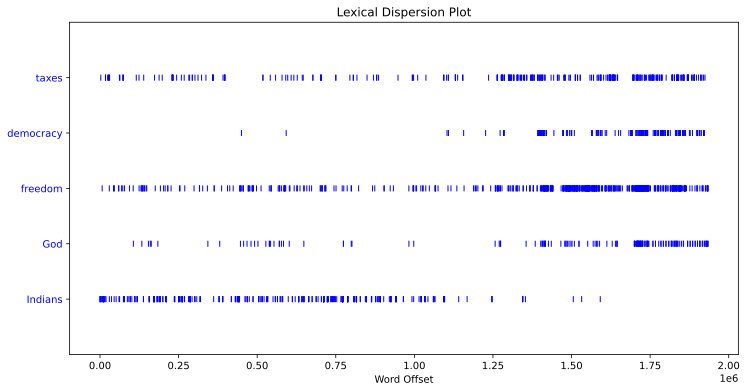

In [36]:
print(len(tokens))
txt.dispersion_plot(["taxes", "democracy", "freedom", "God", "Indians"])

In [37]:
# returns the index or location of a specific search term within a text by a % of total number of words
def getDistrib(lemmas, tokens, searchterm):
    indices = [i for i, x in enumerate(lemmas) if x == searchterm]
    pctInd = [i/len(tokens)*100 for i in indices]
    return(pctInd)

In [38]:
nltk.download() #book - NOTE THIS WILL OPEN A SEPARATE WINDOW, FIND IT, AND SELECT THE "BOOK" TO DOWNLOAD
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\F0040RP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [39]:

#searchterms = ["move","transport","arrive","depart","walk","march"]
searchterms = ["public","religion","god","liberty","freedom","democracy","hope"]

pathlist = sotudir.glob('*.txt')
#rows = []
distDict = {}
distRows = []
for path in pathlist:
    print(path.name)
    #distDict[path.name] = {}
    with open(path,encoding='utf-8') as f:
        txt=f.read()
    ltokens = [tok.lower() for tok in nltk.word_tokenize(txt)]
    #xtsDict[path.name] = ltokens
    lemmas = [lemmatizer.lemmatize(i,j[0].lower()) if j[0].lower() in ['a','n','v'] else lemmatizer.lemmatize(i) for i,j in pos_tag(ltokens)]
    for term in searchterms:
        #distDict[path.name][term] = getDistrib(lemmas,ltokens,term)
        #distDict[(path.name,term)] = getDistrib(lemmas,ltokens,term)
        idxs = getDistrib(lemmas,ltokens,term)
        for i in idxs:
            distRows.append([path.name,term,i])

1790_Washington.txt
1791_Washington.txt
1792_Washington.txt
1793_Washington.txt
1794_Washington.txt
1795_Washington.txt
1796_Washington.txt
1797_Adams.txt
1798_Adams.txt
1799_Adams.txt
1800_Adams.txt
1801_Jefferson.txt
1802_Jefferson.txt
1803_Jefferson.txt
1804_Jefferson.txt
1805_Jefferson.txt
1806_Jefferson.txt
1807_Jefferson.txt
1808_Jefferson.txt
1809_Madison.txt
1810_Madison.txt
1811_Madison.txt
1812_Madison.txt
1813_Madison.txt
1814_Madison.txt


KeyboardInterrupt: 

In [ ]:
termdistdf = pd.DataFrame(distRows,columns = ['text','term','distrib'])
print(termdistdf.tail(12))
termdistdf.iloc[300:320]

In [ ]:
#sns.jointplot(x="distrib",y="term",data=termdistdf)
#sns.stripplot(x = "distrib", y = "term", data = termdistdf, jitter = True, dodge = True, alpha = 0.4)
sns.swarmplot(x = "distrib", y = "term", data = termdistdf,size=3)

In [ ]:
sns.swarmplot(x = "distrib", y = "term", data = termdistdf,size=8)

### Frequency Graphs

<h2 style = "color:gold">Word Clouds</h3>

To create a word cloud of a SOTU address we will use the wordcloud package ([documentation here](https://amueller.github.io/word_cloud/index.html)).

In [ ]:

from wordcloud import WordCloud

#sotuid="Lincoln_1862"
sotuid="1940_Roosevelt"
#f = open('%s.txt'%sotuid)  #the %s is a placeholder in a string. In this case it is assigned the value of sotuid
f = open(Path("sotu2","%s.txt"%sotuid))
sotu = f.read()

#we also could write the above in one line of code:
# f=open("Lincoln_1862.txt").read()
## however writing it out as 3 lines of code, with the first clearly showing the user how they may insert 
### a different president/year combination, makes for more human readable code

In [ ]:
sotu_wc = WordCloud().generate(sotu)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(sotu_wc, interpolation='bilinear')
plt.axis("off")

In [ ]:
sotuid="1944_Roosevelt"
f = open(Path('sotu2','%s.txt'%sotuid))  #the %s is a placeholder in a string. In this case it is assigned the value of sotuid
sotu2 = f.read()

sotu2_wc = WordCloud().generate(sotu2)

plt.imshow(sotu2_wc, interpolation='bilinear')
plt.axis("off")

1. Review the above word clouds. How useful are they for identifying the key themes of a particular SOTU address? How useful are they for comparing SOTU addresses? What steps could perhaps make them more useful?

### Exercises (Word Clouds)

1. Create your own word cloud of a SOTU address of your choice.


2. Import a non-SOTU text of your choice and create a word cloud out of it.


3. Review the information on the wordcloud package site. Using a SOTU text or another text of your choosing, create a custom-made wordcloud of a different style than we used above.

### Appendix to Part 1: Advanced Python - Creating a Graph of the Lexical Diversity of SOTU texts.

### Ib. Lexical Diversity



We can quantify the diversity and complexity of a text's vocabulary by calculating its **lexical diversity**. This is calculated simply by dividing the total number of words found in a text by the number of unique words.

In [ ]:
#we will use ltokens2, which you may recall excludes punctuation but not stopwords
print("# of words = ",len(ltokens2))  #here we are using ltokens2, because we want to keep the stopwords as part of our count
print("# of unique words = ",len(set(ltokens2)))
lexdiv=len(ltokens2)/len(set(ltokens2))
print(lexdiv)

*We will come back to this. For example, after learning how to iterate through a corpus of texts, we will compare the lexical diversity of the SOTU texts to examine how it has changed over time and from president to president.*

In [ ]:
#from nltk.tokenize import RegexpTokenizer #<--necessary only if you didn't run this above
import pandas as pd

txtList=[]
for item in os.listdir():
    fn=item.split(".")[0]
    fileType=item.split(".")[1]
    #if not item.endswith(".txt"):
    if fileType!="txt":
        print("***will not read: ",item,"***")
        continue
    fnparts=fn.split("_")
    pres=fnparts[0]
    year=fnparts[1]
    with open(item,'r') as f:  
        sotu = f.read()
    #tokens = nltk.word_tokenize(sotu)
    # print(item.split(".")[0],"is",len(tokens),"tokens long.")
    tokenizer = RegexpTokenizer(r'\w+')
    tokens2=tokenizer.tokenize(sotu)
    ltokens2=[tok.lower() for tok in tokens2]
    numWords=len(ltokens2)
    numUniqWords=len(set(ltokens2))
    try:
        #lexdiv=len(ltokens2)/len(set(ltokens2))
        lexdiv=numWords/numUniqWords
        print("The lexical diversity of",item,"is:",lexdiv)
    except ZeroDivisionError:
        print("The lexical diversity of",item,"is N/A")
    txtList.append([pres,year,numWords,numUniqWords,lexdiv])

colnames=['pres','year','numWords','numUniqWords','lexdiv']
sotudf=pd.DataFrame(txtList,columns=colnames)  ##

In [ ]:
sotudf

In [ ]:
import matplotlib.pyplot as plt

#plt.plot(sotudf['year'],sotudf['lexdiv']) #for a line graph
plt.bar(sotudf['year'], sotudf['lexdiv'], color='maroon',
        width = 2, edgecolor='grey')
plt.title('The Lexical Diversity of SOTU over time')
plt.xlabel('Year')
plt.ylabel('Lex Div')
plt.show()

## Appendix to Part II: Other Ways to Calculate Frequencies

As is common in Python, there are multiple ways to accomplish the same task. Below are two other ways to calculate frequency distributions.

1. First, we can use the Pandas library to convert the ngrams into a Series and then create a frequency list.

In [ ]:
n=2
n_grams=list(ngrams(ltokens3,n))
(pd.Series(n_grams).value_counts())[:7]
#(pd.Series(nltk.ngrams(ltokens3,2)).value_counts())[:5] 

2. Second we can use the Collections library in a very similar way to NLTK's FreqDist.

In [ ]:
freqctr=collections.Counter(n_grams)
print(freqctr.most_common(5))